## 1.Importing important libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Reading CSV file

In [72]:
data=pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## 3.Data Exploration

In [73]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [75]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [76]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

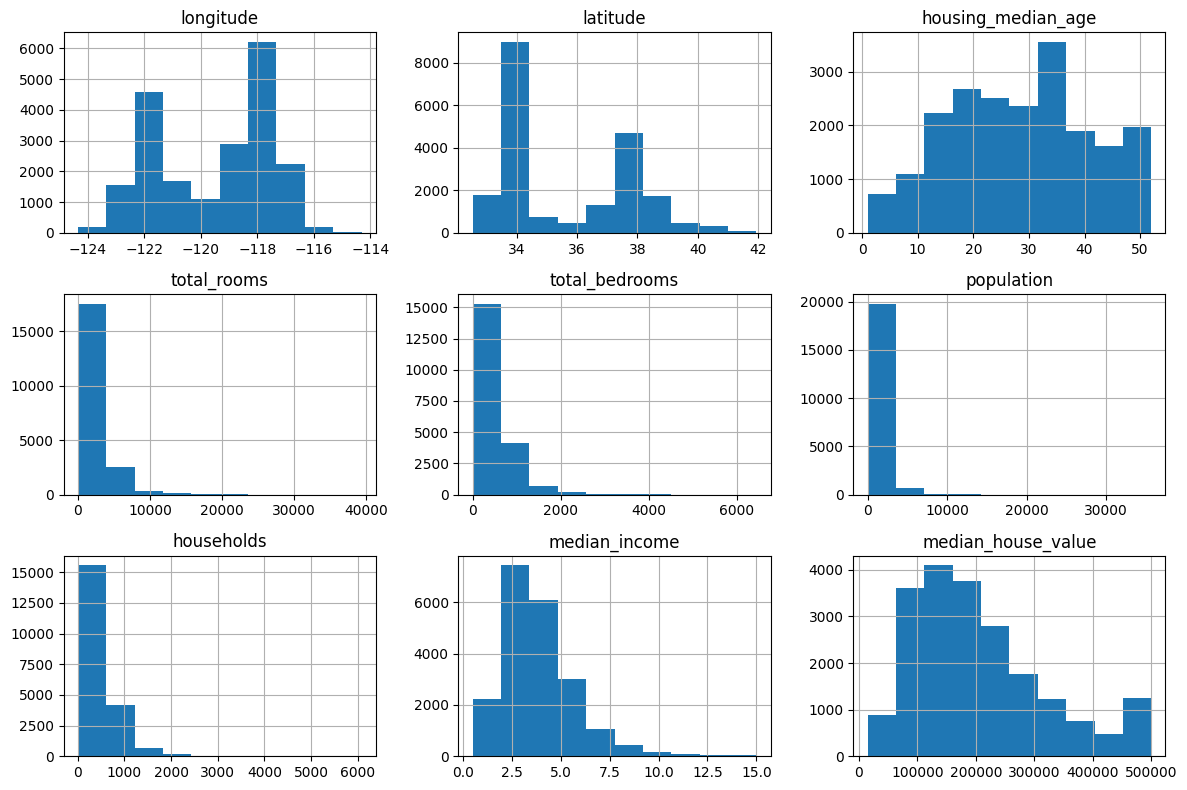

In [77]:
data.hist(figsize=(12,8))
plt.tight_layout()

<Axes: >

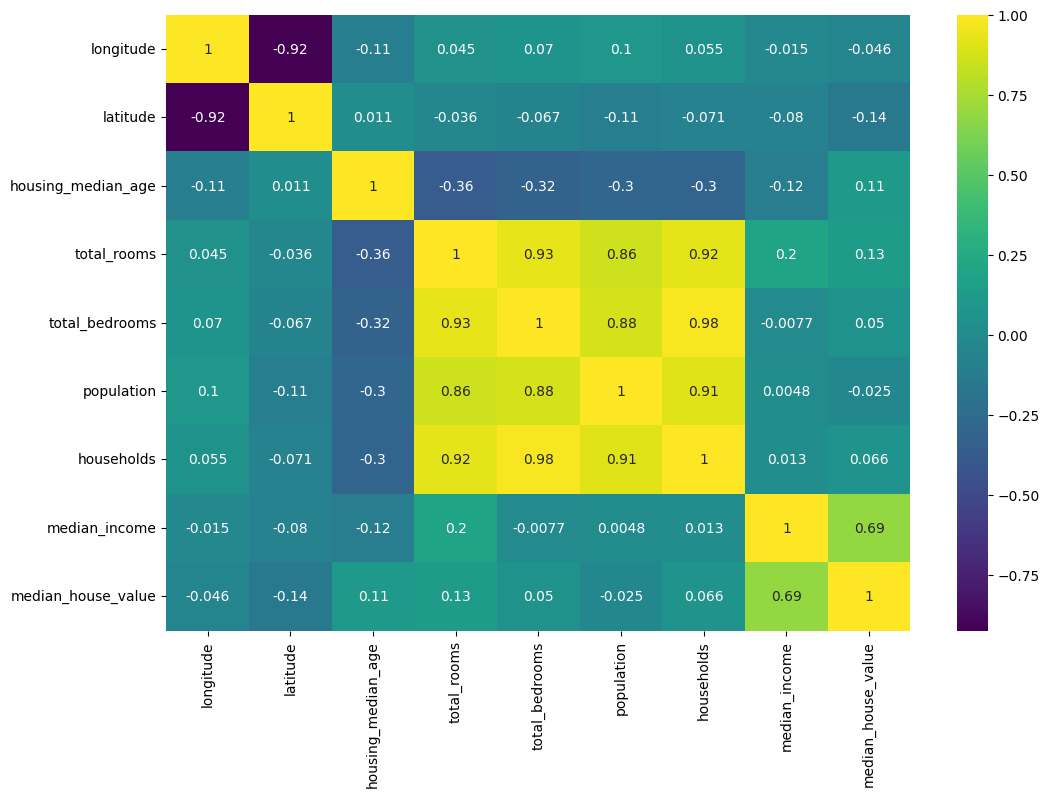

In [78]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='viridis')


## 4.Data Cleaning

In [79]:
# 'total_bedrooms' has missing values
data['total_bedrooms']=data["total_bedrooms"].fillna(data["total_bedrooms"].median())


In [80]:
data = pd.get_dummies(data, columns=["ocean_proximity"], drop_first=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,True,False,False,False


In [81]:
# Convert all boolean columns to float
data = data.astype({col: 'float' for col in data.select_dtypes('bool').columns})


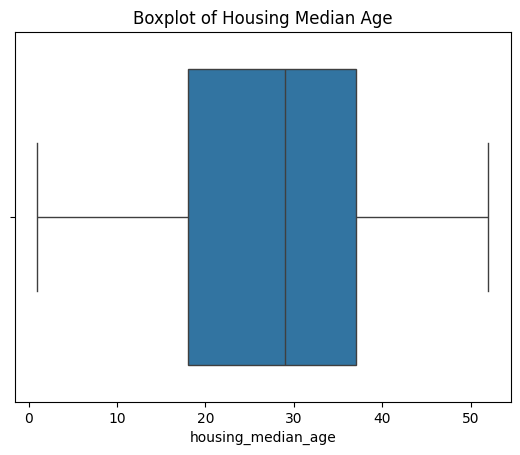

In [82]:
sns.boxplot(x=data["housing_median_age"])
plt.title("Boxplot of Housing Median Age")
plt.show()


## 5.Final Dataset

In [83]:
X=data.drop(['median_house_value'],axis=1)
y=data.median_house_value

## 6.Splitting Data

In [84]:
train_X,test_X=X[:18500],X[18500:]
train_y,test_y=y[:18500],y[18500:]

## 7.Feature Engineering

In [85]:
train_data=train_X.join(train_y)
train_data['room/hs']=train_data['total_rooms']/train_data['households']
train_data['bedratio']=train_data['total_rooms']/train_data['total_bedrooms']

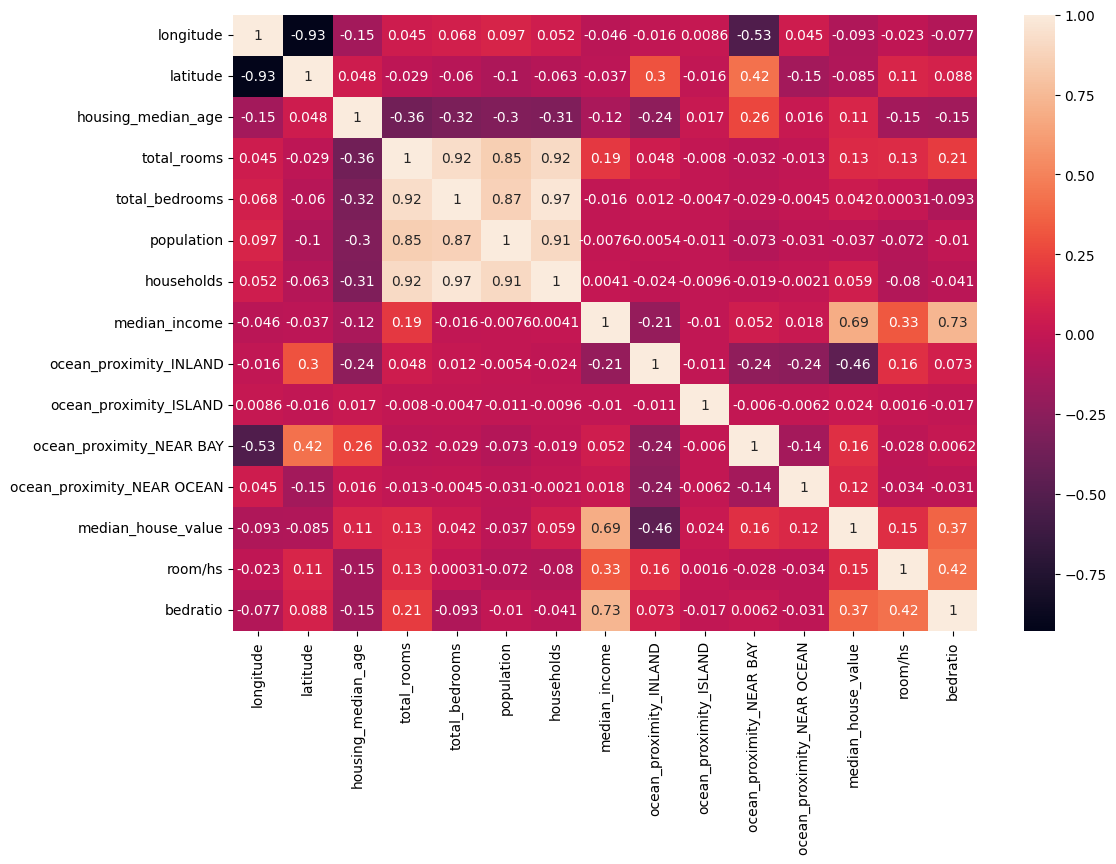

In [86]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

Our constructed features have siginficant correlation with target value.

## 7.Model Training using Normal Equation

In [87]:
train_data.dtypes

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
ocean_proximity_INLAND        float64
ocean_proximity_ISLAND        float64
ocean_proximity_NEAR BAY      float64
ocean_proximity_NEAR OCEAN    float64
median_house_value            float64
room/hs                       float64
bedratio                      float64
dtype: object

In [88]:
# Compute weights (theta)
theta = np.linalg.inv(train_X.T @ train_X) @ train_X.T @ train_y


In [90]:
# Ensure both are NumPy arrays
test_X = np.array(test_X)
theta = np.array(theta)

# Now do matrix multiplication
y_pred = test_X @ theta


## 8.Testing Model Performance

In [92]:
def rmse(yt, y_pred):
    return np.sqrt(np.mean((yt - y_pred) ** 2))

def r2_score(yt, y_pred):
    ss_total = np.sum((yt - yt.mean()) ** 2)
    ss_res = np.sum((yt - y_pred) ** 2)
    return 1 - (ss_res / ss_total)

print("RMSE:", rmse(test_y, y_pred))
print("R² Score:", r2_score(test_y, y_pred))


RMSE: 55833.19166504794
R² Score: 0.6198147683562563


## 9.Plotting data

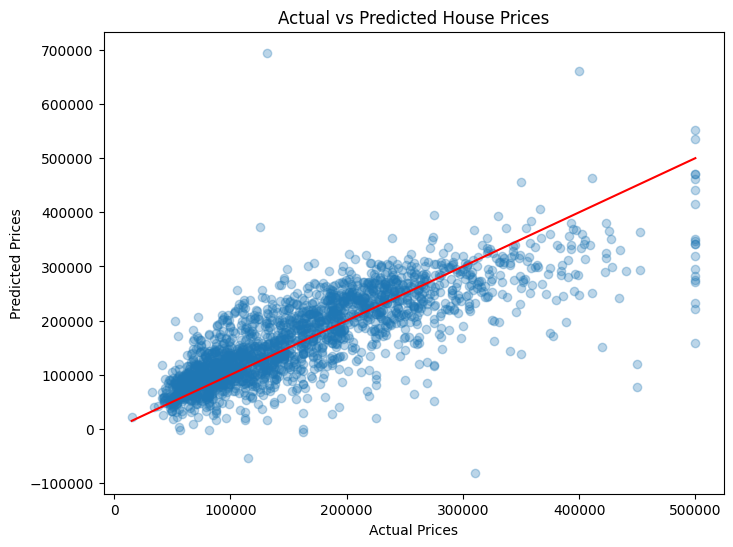

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y, y_pred, alpha=0.3)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r')
plt.show()
